# Customer Segmentation Analysis

In [2]:
#importing the pandas lib
import pandas as pd

In [3]:
# import the csv file
df = pd.read_csv(r"C:\Users\Vaibhav\Downloads\Mall_Customers (1).csv")

In [4]:
df

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


##### **Descriptive Statistics:**

Basic statistics such as mean, median, mode, range, and standard deviation for the numerical columns (Age, Annual Income, Spending Score).

In [5]:
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


#### **Age Distribution:**

The distribution of customers based on age using Histogram.

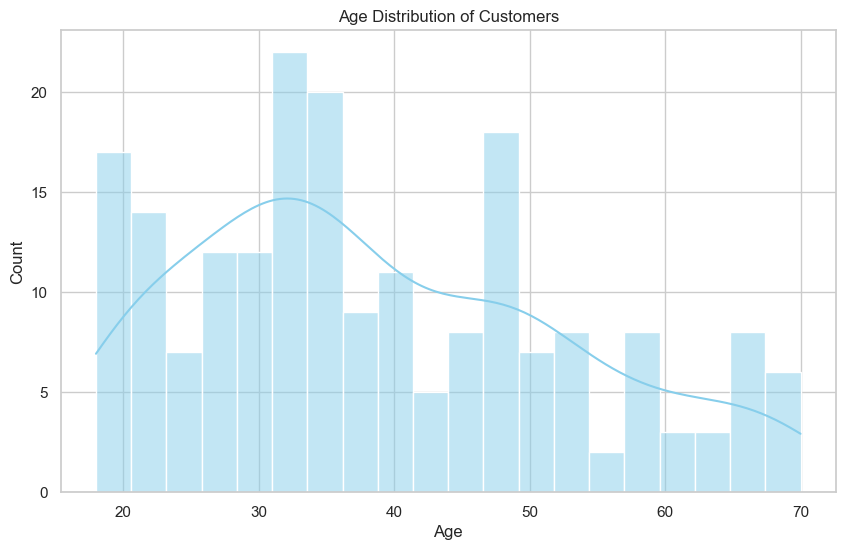

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns

#Set the style for the plot
sns.set(style="whitegrid")

# Create a histogram for age distribution
plt.figure(figsize=(10, 6))
sns.histplot(df['Age'], bins=20, kde=True, color='skyblue')
plt.title('Age Distribution of Customers')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()

#### **Income Distribution:**
The distribution of annual incomes using a histogram

Text(0.5, 1.0, 'Annual Income Distribution')

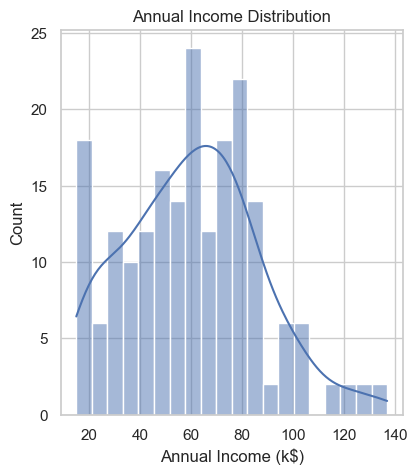

In [7]:
# Annual Income distribution
plt.figure(figsize=(15, 5))
plt.subplot(1, 3, 2)
sns.histplot(df['Annual Income (k$)'], bins=20, kde=True)
plt.title('Annual Income Distribution')

#### **Spending Score Distribution:**

The distribution of spending scores using a histogram or a box plot.

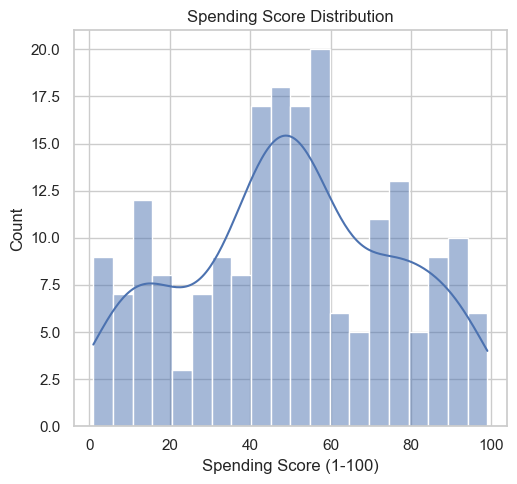

In [8]:
# Spending Score distribution
plt.figure(figsize=(15, 5))
plt.subplot(1, 3, 3)
sns.histplot(df['Spending Score (1-100)'], bins=20, kde=True)
plt.title('Spending Score Distribution')

plt.tight_layout()
plt.show()

#### **Gender Distribution:**

The distribution of customers based on gender using pie chart.

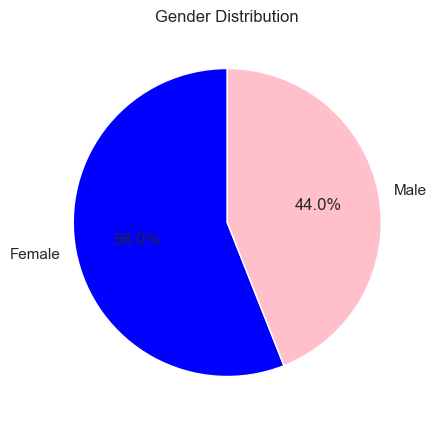

In [9]:
#Pie chart for gender distribution
gender_counts = df['Gender'].value_counts()
plt.figure(figsize=(5, 5))
plt.pie(gender_counts, labels=gender_counts.index, autopct='%1.1f%%', colors=['blue', 'pink'], startangle=90)
plt.title('Gender Distribution')
plt.show()

#### **Gender vs. Spending Score:**

The spending scores between male and female customers using a box plot.

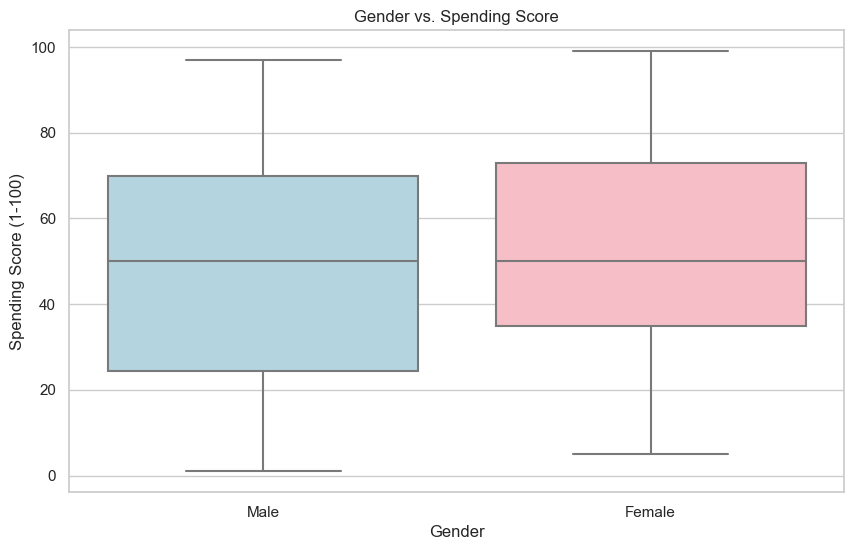

In [10]:
# Set the style for the plot
sns.set(style="whitegrid")

# Create a box plot for comparing spending scores between male and female customers
plt.figure(figsize=(10, 6))
sns.boxplot(x='Gender', y='Spending Score (1-100)', data=df, palette={"Male": "lightblue", "Female": "lightpink"})
plt.title('Gender vs. Spending Score')
plt.xlabel('Gender')
plt.ylabel('Spending Score (1-100)')
plt.show()

#### **Correlation Analysis:**

The correlation coefficients between different numerical variables (e.g., Age, Annual Income, Spending Score) to identify potential relationships.

Correlation Matrix:
                             Age  Annual Income (k$)  Spending Score (1-100)
Age                     1.000000           -0.012398               -0.327227
Annual Income (k$)     -0.012398            1.000000                0.009903
Spending Score (1-100) -0.327227            0.009903                1.000000


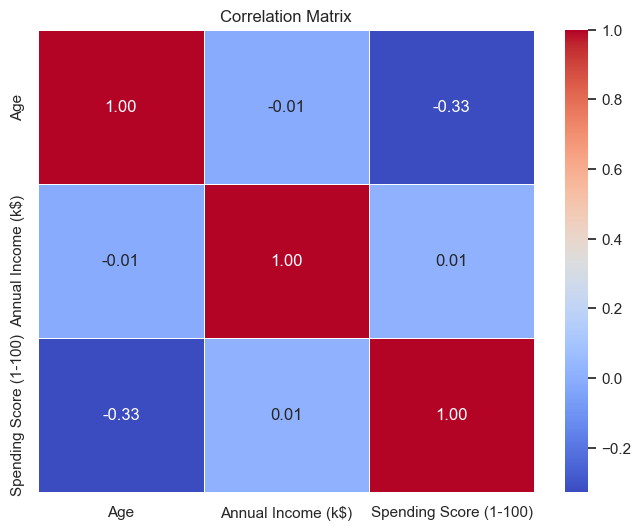

In [11]:
# Calculate correlation coefficients
correlation_matrix = df[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']].corr()

# Display the correlation matrix
print("Correlation Matrix:")
print(correlation_matrix)

# Create a heatmap of the correlation matrix using seaborn library


plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation Matrix')
plt.show()

# Customer Segmentation:

clustering algorithms (K-means clustering) to segment customers based on their age, income, and spending score.

In [12]:
df1 = df.iloc[:,2:]

In [13]:
df1

,Age,Annual Income (k$),Spending Score (1-100)
0,19,15,39
1,21,15,81
2,20,16,6
3,23,16,77
4,31,17,40
...,...,...,...
195,35,120,79
196,45,126,28
197,32,126,74
198,32,137,18


In [14]:
# feature scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler() #max limit comes from -3 to +3
df1.iloc[:,:] = sc.fit_transform(df1.iloc[:,:])
print(df1)

          Age  Annual Income (k$)  Spending Score (1-100)
0   -1.424569           -1.738999               -0.434801
1   -1.281035           -1.738999                1.195704
2   -1.352802           -1.700830               -1.715913
3   -1.137502           -1.700830                1.040418
4   -0.563369           -1.662660               -0.395980
..        ...                 ...                     ...
195 -0.276302            2.268791                1.118061
196  0.441365            2.497807               -0.861839
197 -0.491602            2.497807                0.923953
198 -0.491602            2.917671               -1.250054
199 -0.635135            2.917671                1.273347

[200 rows x 3 columns]


c:\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_in

[600.0, 389.3861889564372, 295.2122461555488, 205.22514747675916, 168.24758017556834, 133.86833362685584, 117.13060763524547, 103.81797230310198, 92.86066988018615, 81.60207581747052]


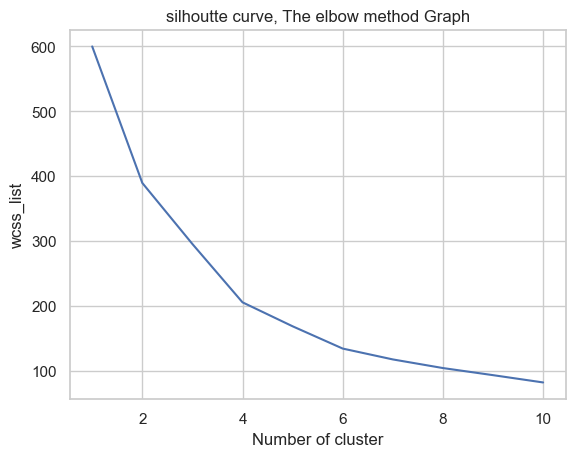

In [15]:
# elbow method is used to find the value of "K" that how many cluster are going to form.
# elbow method :- the value of k is the point after a that their value remain constant.
# we import the kmeans class of sklearn.cluster lib to form the cluster.
from sklearn.cluster import KMeans

# next we have created the wcss_list variable to intialize an empty list,
# which is used

wcss_list = [] #It contain sum of square of all the data set A/c to cluster

for i in range(1,11):
    k_mean = KMeans(n_clusters = i,init = "k-means++", random_state = 1)
    k_mean.fit(df1)
    wcss_list.append(k_mean.inertia_)#silhoutte curve
plt.plot(range(1,11),wcss_list)
plt.title("silhoutte curve, The elbow method Graph")
plt.xlabel("Number of cluster")
plt.ylabel("wcss_list")
plt.show

print(wcss_list)

In [16]:
from kneed import KneeLocator
kl = KneeLocator(range(1,11),wcss_list, curve = "convex",direction = "decreasing")
kl.elbow

4

In [17]:
k_mean = KMeans(n_clusters =4, init = "k-means++", random_state = 1)
y_pred = k_mean.fit_predict(df1)
y_pred

c:\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


array([0, 0, 0, 0, 0, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 0, 0, 3, 0, 0, 0,
       3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0,
       3, 0, 3, 0, 0, 0, 3, 0, 0, 3, 3, 3, 3, 3, 0, 3, 3, 0, 3, 3, 3, 0,
       3, 3, 0, 0, 3, 3, 3, 3, 3, 0, 3, 3, 0, 3, 3, 0, 3, 3, 0, 3, 3, 0,
       0, 3, 3, 0, 3, 3, 0, 0, 3, 0, 3, 0, 0, 3, 3, 0, 3, 0, 3, 3, 3, 3,
       3, 0, 2, 0, 0, 0, 3, 3, 3, 3, 0, 2, 1, 1, 2, 1, 2, 1, 3, 1, 2, 1,
       2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1,
       2, 1, 2, 1, 2, 1, 3, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1,
       2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1,
       2, 1])

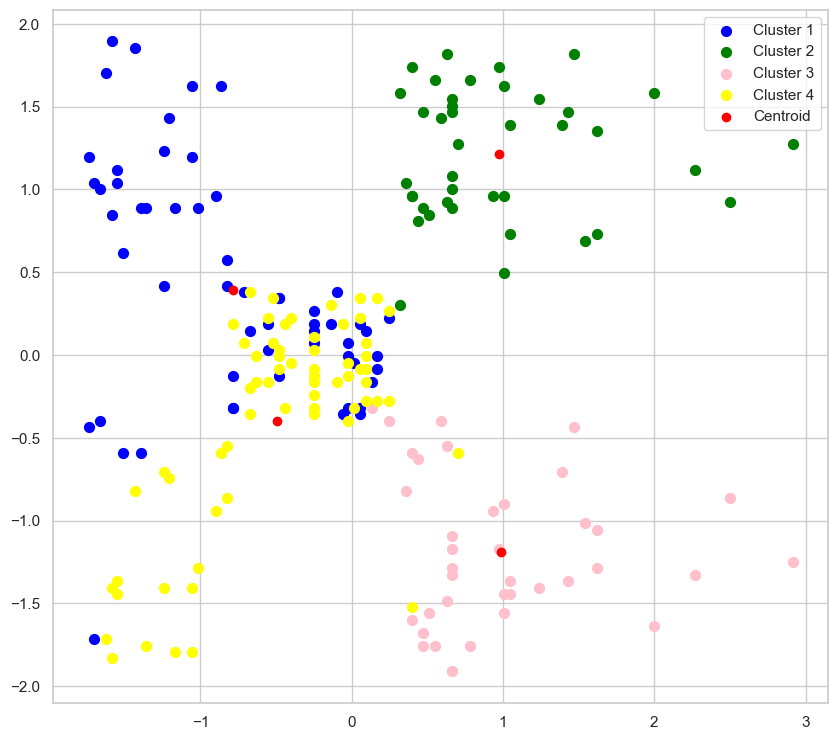

In [18]:
# Visualizing the clusters
# For first cluster
fig = plt.figure(figsize =(10,9))
plt.scatter(df1.iloc[y_pred==0,1],df1.iloc[y_pred==0,2],s=50,c='blue',label='Cluster 1')
# For second cluster
plt.scatter(df1.iloc[y_pred==1,1],df1.iloc[y_pred==1,2],s=50,c='green',label='Cluster 2')
# For third cluster
plt.scatter(df1.iloc[y_pred==2,1],df1.iloc[y_pred==2,2],s=50,c='pink',label='Cluster 3')
# For fourth cluster
plt.scatter(df1.iloc[y_pred==3,1],df1.iloc[y_pred==3,2],s=50,c='yellow',label='Cluster 4')

plt.scatter(k_mean.cluster_centers_[:,1],k_mean.cluster_centers_[:,2],c='red',label='Centroid')
plt.legend()

#### **Income Group Analysis:**

Categorize customers into income groups and analyze spending patterns within each group.

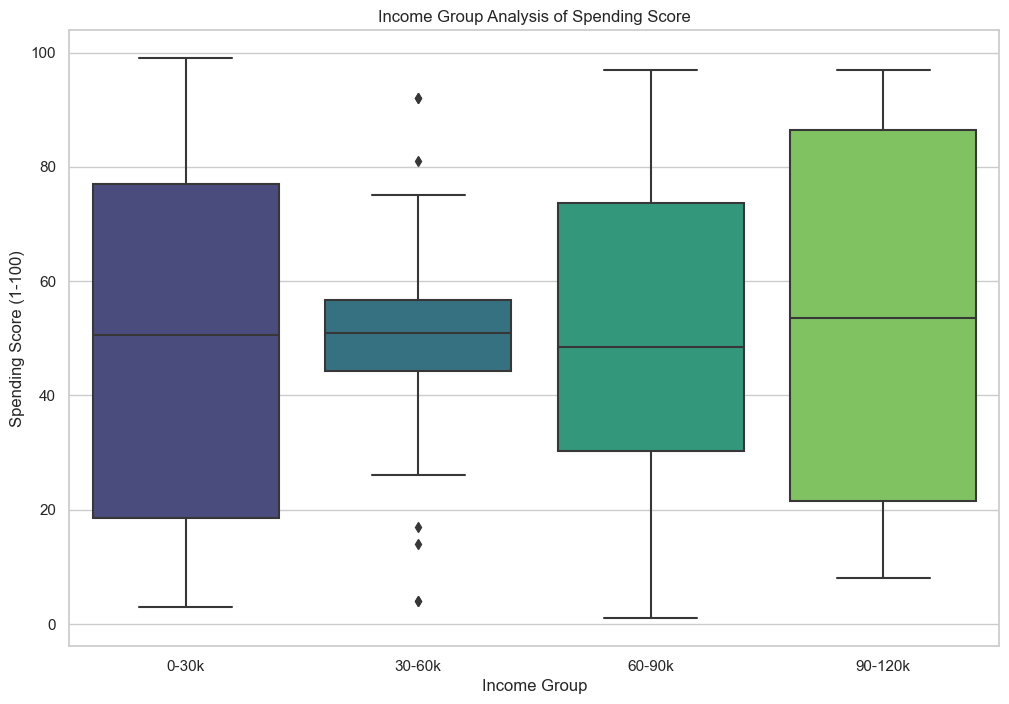

In [19]:
# Define income groups
income_bins = [0, 30, 60, 90, 120]
income_labels = ['0-30k', '30-60k', '60-90k', '90-120k']

# Create a new column 'Income Group' based on the defined bins
df['Income Group'] = pd.cut(df['Annual Income (k$)'], bins=income_bins, labels=income_labels, right=False)

# Set the style for the plot
sns.set(style="whitegrid")

# Create a box plot to analyze spending patterns within each income group
plt.figure(figsize=(12, 8))
sns.boxplot(x='Income Group', y='Spending Score (1-100)', data=df, palette="viridis")
plt.title('Income Group Analysis of Spending Score')
plt.xlabel('Income Group')
plt.ylabel('Spending Score (1-100)')
plt.show()

#### **Age Group Analysis:**

Categorize customers into age groups and analyze spending patterns within each group.

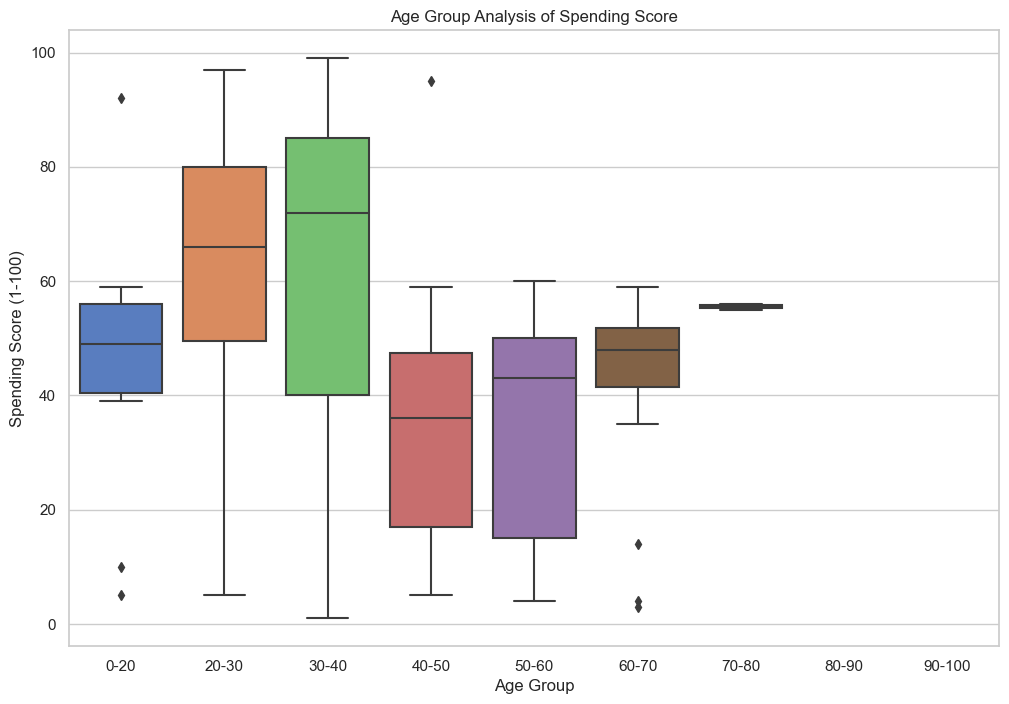

In [20]:
# Define age groups
age_bins = [0, 20, 30, 40, 50, 60, 70, 80, 90, 100]
age_labels = ['0-20', '20-30', '30-40', '40-50', '50-60', '60-70', '70-80', '80-90', '90-100']

# Create a new column 'Age Group' based on the defined bins
df['Age Group'] = pd.cut(df['Age'], bins=age_bins, labels=age_labels, right=False)

# Set the style for the plot
sns.set(style="whitegrid")

# Create a box plot to analyze spending patterns within each age group
plt.figure(figsize=(12, 8))
sns.boxplot(x='Age Group', y='Spending Score (1-100)', data=df, palette="muted")
plt.title('Age Group Analysis of Spending Score')
plt.xlabel('Age Group')
plt.ylabel('Spending Score (1-100)')
plt.show()

In [21]:
# Calculate average age, income, and spending score
average_age = df['Age'].mean()
average_income = df['Annual Income (k$)'].mean()
average_spending_score = df['Spending Score (1-100)'].mean()

# Display the results
print(f"Average Age: {average_age:.2f}")
print(f"Average Income: ${average_income:.2f}k")
print(f"Average Spending Score: {average_spending_score:.2f}")

Average Age: 38.85
Average Income: $60.56k
Average Spending Score: 50.20


#### **Customer Ranking:**

Rank customers based on their spending scores and identify the top and bottom customers using Tree map

In [30]:
import pandas as pd
import plotly.express as px



# Rank customers based on spending scores
df['Rank'] = df['Spending Score (1-100)'].rank(ascending=False)

# Get the top and bottom 10 customers
top_10_customers = df[df['Rank'] <= 10]
bottom_10_customers = df[df['Rank'] > len(df) - 10]

# Create TreeMap for top 10 customers
fig_top = px.treemap(top_10_customers, path=['CustomerID'], values='Spending Score (1-100)',
                     title='Top 10 Customers - Spending Score',
                     color='Spending Score (1-100)',
                     color_continuous_scale='blues')

# Create TreeMap for bottom 10 customers
fig_bottom = px.treemap(bottom_10_customers, path=['CustomerID'], values='Spending Score (1-100)',
                        title='Bottom 10 Customers - Spending Score',
                        color='Spending Score (1-100)',
                        color_continuous_scale='reds')

# Show the visualizations
fig_top.show()
fig_bottom.show()
